In [9]:
'''
Author:        James Parkington
Created Date:  7/29/2023
Modified Date: 7/29/2023

Any imports that are shared across cells can be imported through this initial cell. I've also introduced some 
runtime configuration parameters to define attributes of each chart once, so that they're treated as defaults 
for each subsequent plot.
'''

import calendar          as cal
import datetime          as dtt
import numpy             as np
import pandas            as pd
import seaborn           as sns
import scipy             as sci
import matplotlib.pyplot as plt

from cycler import cycler
from typing import *

plot_params = {
    # Axes parameters                            # Tick parameters
    'axes.facecolor'     : 'black',              'xtick.labelsize'    : 8,
    'axes.grid'          : False,                'xtick.color'        : 'white',
    'axes.labelcolor'    : 'white',              'xtick.major.size'   : 0,
    'axes.spines.left'   : False,                'ytick.labelsize'    : 8,
    'axes.spines.right'  : False,                'ytick.color'        : 'white',
    'axes.spines.top'    : False,                'ytick.major.size'   : 0,
    'axes.labelsize'     : 10,
    'axes.labelweight'   : 'bold',               # Legend parameters
    'axes.titlesize'     : 12,                   'legend.fontsize'    : 8,
    'axes.titleweight'   : 'bold',               'legend.facecolor'   : '0.3',
    'axes.labelpad'      : 15,                             

    # Grid parameters                            # Figure parameters
    'grid.linestyle'     : ':',                  'figure.facecolor'   : 'black',
    'grid.color'         : '0.5',                'figure.figsize'     : (12, 8),

    # Font and text parameters                   # Color cycles  
    'font.family'        : 'DejaVu Sans Mono',   'axes.prop_cycle'    : cycler(color = sns.color_palette('Set2')), 
    'font.size'          : 8,                    'image.cmap'         : 'Set2',
    'font.style'         : 'normal',
    'text.color'         : 'white'}

plt.rcParams.update(plot_params)

1. What is the busiest month of the year for bike rentals? Can this information guide marketing and staffing decisions?
2. What are the busiest and slowest days of the week for bike rentals? Could this information guide staffing or promotional events?
3. What are the top 5 busiest hours for bike rentals for each season? Could this information guide staffing decisions?
4. How does demand for bike rentals change across different hours of the day? Could this information guide the operating hours of the bike rental service?
5. Are there specific hours of the day that see a sharp increase or decrease in bike rentals across different weather situations? Could this information guide preparations for sudden surges or drops in demand?
6. During which hours do casual users tend to rent more bikes compared to registered users? What marketing strategies could be developed based on this information?
7. Do registered users show different rental patterns compared to casual users across seasons, weather, and time of day? Could this information guide user-specific strategies?
8. How does the distribution of bike rentals differ between casual and registered users across different weather conditions? Could this information guide user-specific strategies?
9. How does the number of bike rentals change from month to month for registered users versus casual users? Could this information guide user-specific marketing or loyalty programs?
10. Do bike rentals increase on holidays due to an increase in casual users or registered users? Could this information guide targeted holiday promotions or communications?
11. What weather conditions lead to the biggest drop in rentals? How could the company mitigate this?
12. How does the number of bike rentals vary during different weather situations on holidays? Could this information guide staffing and inventory decisions?
13. How do bike rentals change during different weather situations on working days? Could this information help with demand prediction and planning?
14. Do specific weather conditions affect casual users more than registered users? Could this information guide user-specific communication or service strategies?
15. How does temperature correlate with the number of bike rentals? How could this information be used for demand forecasting?
16. How does the combination of temperature, humidity, and wind speed affect bike rentals across different seasons? Could this information guide service planning and user communication?
17. How does a working day versus a non-working day impact bike rentals across different seasons? Could this information guide staffing and inventory management?
18. How does bike rental behavior change between 2011 and 2012? Can we attribute this to specific factors in the dataset?
19. How do rental patterns change during holiday seasons? Could promotional holiday packages be introduced to boost rentals?
20. During what hours are bikes least used? Could these times be used for maintenance or other activities?
21. Can we predict the number of bike rentals for a given hour based on the weather situation, temperature, humidity, and wind speed?
22. Which season has the highest number of rentals? Could this information be used for season-specific marketing or events?
23. How does humidity impact the number of rentals? Could this information be used to inform renters or guide marketing strategies?
24. How does wind speed correlate with bike rentals? Do windy conditions discourage rentals?
25. Given the patterns and trends in the data, what strategic recommendations would you make to a company operating a bike rental service?

In [2]:
def load_bike_sharing_data() -> pd.DataFrame:   
    '''
    Loads the Bike Sharing Dataset from the UCI Machine Learning Repository.

    The dataset represents two years (2011 and 2012) of the hourly count of rental bikes from the Capital 
    Bikeshare system in Washington D.C., USA. The counts are categorized as casual, registered, or total, with 
    additional information about the specific hour, weather conditions, and more.

    The dataset includes the following fields:

    - instant     (int)   : Record index
    - dteday      (str)   : Date
    - season      (int)   : Season (1: spring, 2: summer, 3: fall, 4: winter)
    - yr          (int)   : Year (0: 2011, 1: 2012)
    - mnth        (int)   : Month (1 to 12)
    - hr          (int)   : Hour (0 to 23)
    - holiday     (int)   : Whether the day is a holiday or not
    - weekday     (int)   : Day of the week
    - workingday  (int)   : 1 if the day is neither a weekend nor holiday, otherwise 0
    - weathersit  (int)   : Weather conditions (1: clear, 2: mist/cloudy, 3: light snow/rain, 4: heavy rain/snow/fog)
    - temp        (float) : Normalized temperature in Celsius (values divided by 41)
    - atemp       (float) : Normalized feeling temperature in Celsius (values divided by 50)
    - hum         (float) : Normalized humidity (values divided by 100)
    - windspeed   (float) : Normalized wind speed (values divided by 67)
    - casual      (int)   : Count of casual users
    - registered  (int)   : Count of registered users
    - cnt         (int)   : Count of total rental bikes including both casual and registered

    After loading the dataset, we'll conduct an exploratory data analysis to uncover the underlying patterns 
    and relationships in the data. This will include a variety of techniques such as data visualization, 
    aggregation, and correlation analysis.

    Returns:
        pd.DataFrame: The Bike Sharing dataset as a pandas DataFrame.
    '''

    df = pd.read_csv("./Data/hour.csv")
    return df

bike_sharing = load_bike_sharing_data()
bike_sharing

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


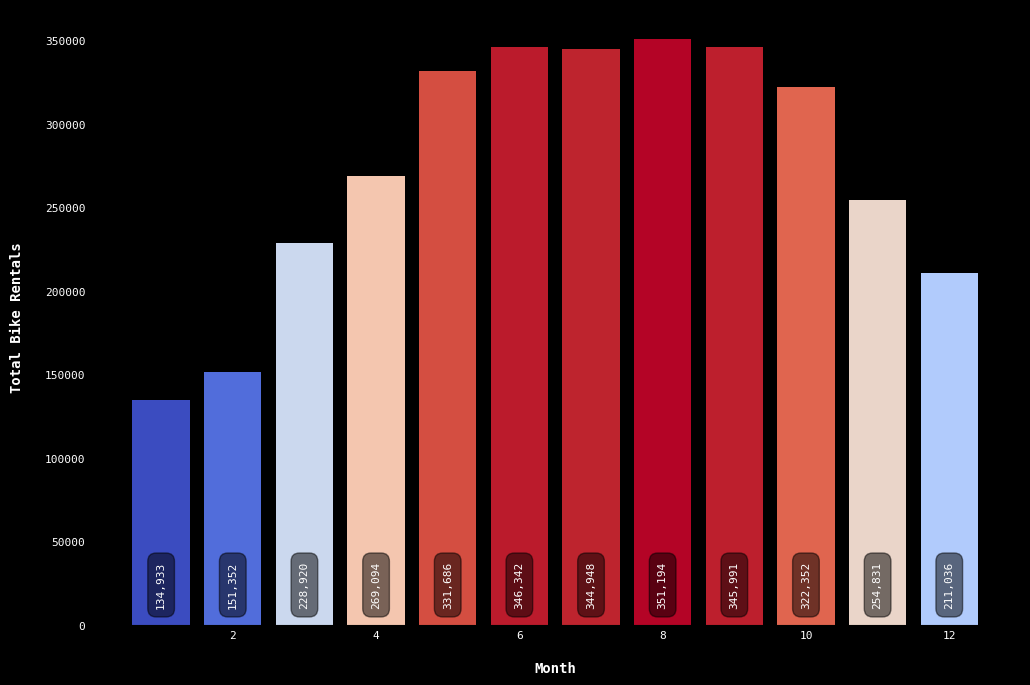

mnth
1     134933
2     151352
3     228920
4     269094
5     331686
6     346342
7     344948
8     351194
9     345991
10    322352
11    254831
12    211036
Name: cnt, dtype: int64

In [5]:
# 1. What is the busiest month of the year for bike rentals?

def busiest_month(df : pd.DataFrame) -> str:
    '''
    Finds and visualizes the busiest month of the year for bike rentals with a heatmap-like color scheme.
    
    This function groups the data by month and sums the total counts of bike rentals for each month.
    The result is visualized using a bar plot with a heatmap-like color palette, where the color intensity
    corresponds to the number of rentals, providing a visually compelling representation of the busiest months.

    Parameters:
        df (pd.DataFrame) : The bike sharing dataset as a pandas DataFrame.
    
    Insights drawn from this analysis could be valuable for making informed decisions regarding marketing campaigns, 
    staffing, inventory management, etc. For instance, during the busiest month, bike-sharing companies might want 
    to increase their marketing efforts to maximize profit, ensure they have sufficient staff to handle the increased 
    demand, and make sure they have enough bikes in inventory to meet customer needs.
    '''

    month_counts = df.groupby('mnth')['cnt'].sum()
    norm         = plt.Normalize(month_counts.min(), month_counts.max())
    
    bars = plt.bar(x      = month_counts.index, 
                   height = month_counts.values, 
                   color  = plt.cm.coolwarm(norm(month_counts.values)))
    
    for bar in bars:
        plt.text(bar.get_x() + bar.get_width() / 2, 10000, f'{int(bar.get_height()):,}',
                 va = 'bottom', ha = 'center', rotation = 90,
                 bbox = dict(facecolor = '0', alpha = 0.5, boxstyle = 'round, pad = 0.75'))
    
    plt.xlabel('Month')
    plt.ylabel('Total Bike Rentals')
    plt.show()

busiest_month(bike_sharing)

### <span style="color:#0693e3">**Analysis for Question 1**</span>

The results above indicate that the busiest month for bike rentals is August, with a total of **351,194** rentals, closely followed by June and July with **346,342** and **344,948** rentals respectively. The dataset has some clear <span style="color:#0693e3">**seasonality**</span>, since the total number of rentals significantly increases starting from March, reaches its peak in August, and then gradually decreases towards the end of the year. This pattern corresponds to the warmer and more pleasant weather conditions during the spring and summer months.

These insights can be extremely valuable for both operational and strategic decision-making in a hypothetical bike rental company:

- <span style="color:#0693e3">**Inventory Management**</span>  
  High demand months like June, July, and August require sufficient inventory to cater to the increased customer base. Preparation for these months should start well in advance to ensure a smooth supply of bikes.
 
- <span style="color:#0693e3">**Staffing**</span>  
  Higher demand implies more customer interactions, which necessitates increased staffing during these months. This could be in the form of customer service representatives, maintenance staff, or even delivery personnel for companies that offer a drop-off and pick-up service.
 
- <span style="color:#0693e3">**Marketing and Promotions**</span>  
  Marketing campaigns and promotional offers can be strategically timed around these high-demand months to attract new customers and encourage existing customers to use the service more frequently. Conversely, targeted campaigns during the off-peak months can help maintain a flow of rentals during these down periods.
  
- <span style="color:#0693e3">**Pricing Strategy**</span>  
  Dynamic pricing strategies can be adopted where prices are slightly increased during high-demand months, or special discounts are provided during off-peak months to encourage rentals.

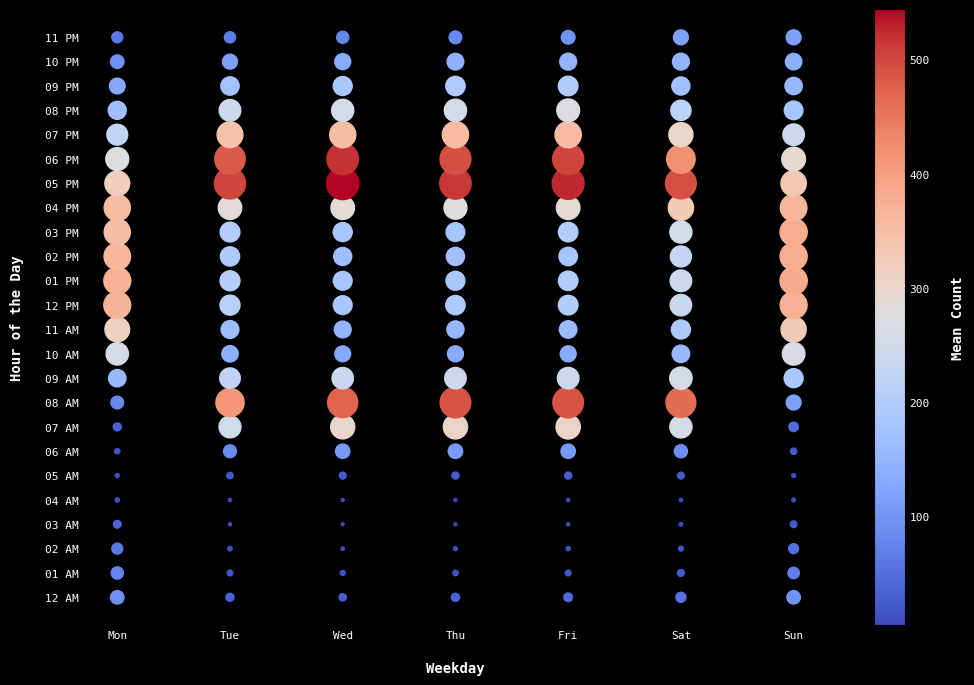

In [11]:
# 2. What are the busiest and slowest weekdays for bike rentals?

def busiest_slowest_weekdays(df : pd.DataFrame) -> None:
    '''
    Finds and visualizes the busiest and slowest weekdays for bike rentals with a scatterplot. Each point's size
    and color indicate the mean number of rentals at that specific weekday and hour.
    
    This function adds a `weekday` column to the DataFrame, groups the data by weekday and hour, then calculates 
    the mean number of bike rentals for each weekday-hour combination. The size and color of the points in the 
    scatterplot represent the mean number of rentals, allowing for a clear visualization of the demand for rentals 
    throughout the week.
    
    Parameters:
        df (pd.DataFrame) : The bike sharing dataset as a pandas DataFrame.
    
    The insights from this analysis could be useful in scheduling staff hours and planning promotional events. 
    For instance, staff levels could be increased during busy periods to ensure good customer service, while 
    promotional events could be scheduled during slower periods to boost demand.
    '''

    weekday_hour_counts = df.groupby(['weekday', 'hr'])['cnt'].mean().reset_index()

    plt.scatter(x    = weekday_hour_counts['weekday'], 
                y    = weekday_hour_counts['hr'], 
                s    = weekday_hour_counts['cnt'], 
                c    = weekday_hour_counts['cnt'], 
                cmap = 'coolwarm')
    
    plt.xticks(ticks = range(7),  labels = list(cal.day_abbr))
    plt.yticks(ticks = range(24), labels = [dtt.datetime.strptime(str(i), "%H").strftime("%I %p") for i in range(24)])
    plt.xlabel('Weekday')
    plt.ylabel('Hour of the Day')
    plt.colorbar(label = 'Mean Count')
    plt.show()

busiest_slowest_weekdays(bike_sharing)

### <span style="color:#0693e3">**Analysis for Question 2**</span>

The scatter plot above provides a detailed view of the average number of bike rentals for every hour of each day of the week. The size and color of each point indicate the mean count of bike rentals, with larger, more red points representing higher counts.

Here are some key observations from the plot:

- <span style="color:#0693e3">**Weekday Patterns**</span>  
  On weekdays (Monday to Friday), the busiest times are around 8 AM and 5 PM, aligning with typical commuting hours. This suggests that a significant portion of the demand during these days comes from commuters.
  
- <span style="color:#0693e3">**Weekend Patterns**</span>  
  On weekends (Saturday and Sunday), demand peaks around 1 PM to 4 PM, indicating a shift towards leisure or non-commute usage.

- <span style="color:#0693e3">**Slowest Times**</span>  
  The slowest times, across all days of the week, are in the early morning hours (from 12 AM to 5 AM), when most people are likely asleep.

Analyzing these bike rental patterns can help a bike-sharing company optimize both operations and promotions. Staffing could be dynamically adjusted based on the expected demand. More personnel could be scheduled for weekday mornings and late afternoons to accommodate commuting riders, while weekend afternoons might need increased staff to handle leisure riders. When the demand is lower, we have an opportunity to boost it with targeted promotional events. For instance, late-night ride events with special discounts could encourage usage during early morning hours. Likewise, marketing campaigns could be tailored to the observed patterns, emphasizing commuting by bike on weekdays and promoting leisurely rides on weekends. Through these strategies, we can effectively cater to the existing customer habits and potentially stimulate new demand.